<a href="https://colab.research.google.com/github/NaufalSyahandra/PCVK_GANJIL_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practicum 5 - Gamma Correction**

## **Task 1**

---

Make Gamma Correction according to the following instructions

### Import Library and Show Image


In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


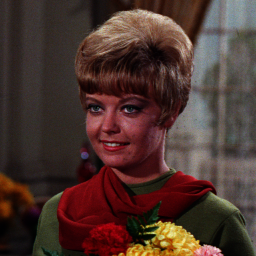

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, log10
import numpy as np

female_img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
cv2_imshow(female_img)

### Function for Gamma Correction

 Gamma Correction in image
----------------------------------
Input Gamma value: 3


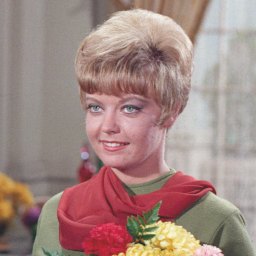

In [3]:
def gamma_correction(img, gamma):
  # Normalize Image to  [0,1]
  normalized = img / 255.0
  corrected = np.power(normalized, 1.0 / gamma)
  return np.uint8(corrected * 255)

# show image with Gamma Correction
print(' Gamma Correction in image')
print('----------------------------------')
try:
  gamma = int(input('Input Gamma value: '))
except ValueError:
  print('Error, not a number')

gamma_img = gamma_correction(female_img, gamma)
cv2_imshow(gamma_img)

## **Task 2**

---

Create Image Depth Simulation

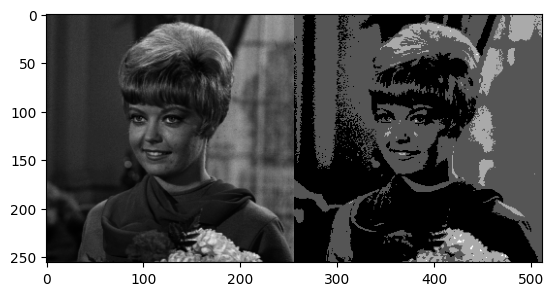

In [5]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round(original[y, x] / level) * level

frame = cv.hconcat([original, depth_image])
plt.imshow(frame, cmap='gray')

## **Task 3**

---
Create an average denoising module according to the formula given in the previous sub-chapter


### Import a clear and noise Galaxy Images

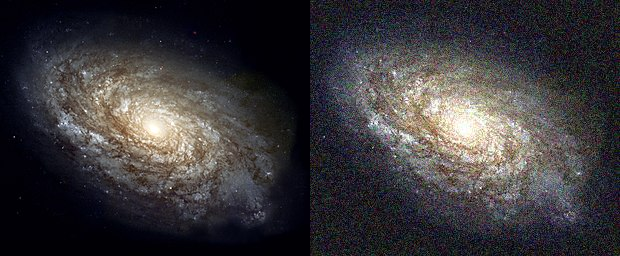

In [11]:
import glob
import cv2 # make sure to import the cv2 module
from google.colab.patches import cv2_imshow # make sure to import cv2_imshow

galaxy = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'): # Check if this path is correct and contains .jpg images
  n= cv2.imread(img)
  cv_img.append(n)

# Check if images were loaded
if len(cv_img) > 0:
  # show different clear and noised image
  frame = cv2.hconcat([galaxy,cv_img[0]]) # use cv2.hconcat
  cv2_imshow(frame)
else:
  print("No images found in the directory.")

### Average Denoising

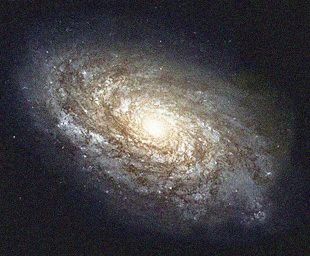

Sum Images:  5
PSNR:  19.404409803205844


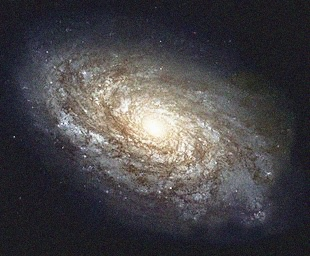

Sum Images:  10
PSNR:  19.587978494228913


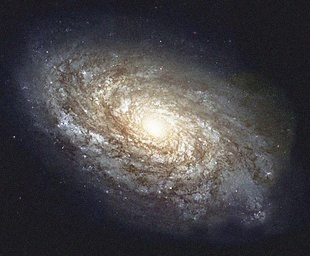

Sum Images:  20
PSNR:  19.68377763848433


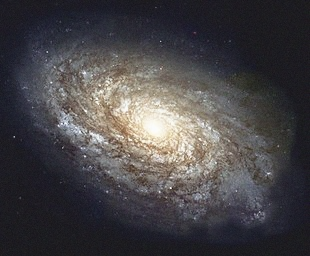

Sum Images:  40
PSNR:  19.729809884740224


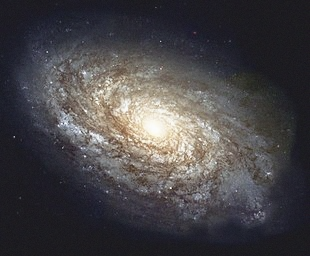

Sum Images:  80
PSNR:  19.753732172700648


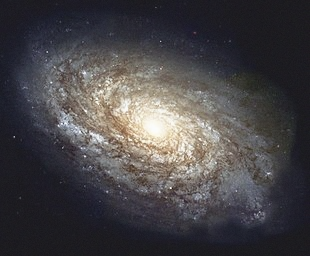

Sum Images:  100
PSNR:  19.758317288501708


In [14]:
# create function to do Peak-to-Noise Ration
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  # if MSE is 0, mean no noise detected, so PSNR not required anymore
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# function to averaging process for each images with noised galaxy images
import numpy as np
from math import log10, sqrt
import cv2

def image_averaging(list_img, total_image):
  # Create an empty array with the same size as the images
  avg_img = np.zeros(list_img[0].shape, dtype=np.float32)
  # Iterate through the list of images and add them up
  for img in list_img:
    avg_img += img
  # Divide the sum by the total number of images to get the average
  avg_img /= total_image
  # Convert the image back to uint8
  avg_img = np.uint8(avg_img)
  return avg_img

# do average denoising process for each 5, 10, so on, we print result
sum_images = np.array([5,10,20,40,80,100])
list_denoised_image = []
for i in sum_images:
  denoised_image = image_averaging(cv_img, i)
  list_denoised_image.append(denoised_image)
  cv2_imshow(denoised_image)
  print('Sum Images: ', i)
  print('PSNR: ', PSNR(galaxy,denoised_image))

## **Task 4**

---

Create a masking image for the following image. The left image is the original image (Couple Image), while the rightmost image is the result:

### Import Couple image and Show it

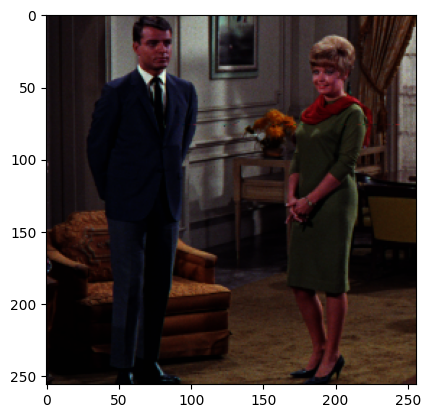

In [20]:
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

plt.imshow(cv.cvtColor(couple,cv.COLOR_BGR2RGB))
plt.show()

### Masking process

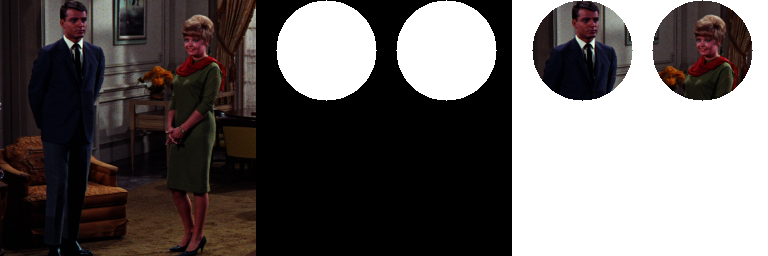

In [33]:
# Make sure the circle coordinates are appropriate for couple.tiff
circle_mask = np.zeros(couple.shape[:2], dtype="uint8")

cv.circle(circle_mask, (70, 50), 50, 255, -1)
cv.circle(circle_mask, (190, 50), 50, 255, -1)

inverse_mask = cv.bitwise_not(circle_mask)
white_background = np.ones_like(couple) * 255

# Apply the mask to the image (masking operation added)
couple_and = cv.bitwise_and(couple, couple, mask=circle_mask)

# Mask white area for black part
white_part = cv.bitwise_and(white_background, white_background, mask=inverse_mask)

# Concat result
final_result = cv.add(couple_and, white_part)

# Show
frame = cv.hconcat([couple,cv.cvtColor(circle_mask, cv.COLOR_GRAY2BGR),final_result])
cv2_imshow(frame)

## **Task 5**

---

Experiment using other operators and show the results in this module. Write down the results of your analysis as to why the output image is like that.

### Not Operator



explanation: NOT (cv2.bitwise_not):
1. This operation inverts the pixel values.
2. For a mask, all black pixels (value 0) become white (value 255), and all white pixels (value 255) become black (value 0).
3. Why this result?: It’s like flipping a switch—what was "off" becomes "on," and vice versa.

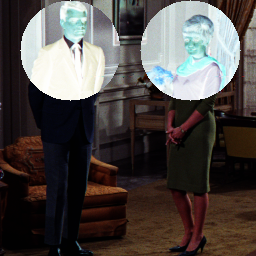

In [34]:
couple_not = cv.bitwise_not(couple,couple.copy(),mask=circle_mask)
cv2_imshow(couple_not)

### OR Operator



explanation: OR (cv2.bitwise_or):
1. It combines two images or an image and a mask.
2. If either of the pixel values in the two images is non-zero (i.e., "on"), the result pixel is set to "on" (white).
3. Why this result?: OR only requires one of the two pixels to be "on" (white). So, the result will be "on" wherever at least one input image has a bright pixel.

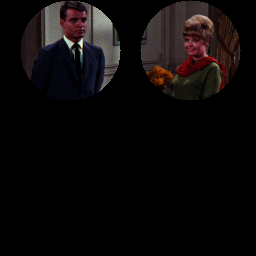

In [35]:
couple_or = cv.bitwise_or(couple,couple.copy(),mask=circle_mask)
cv2_imshow(couple_or)

### AND Operator



explanation: AND (cv2.bitwise_and):
1. This keeps only the parts where both input images or the image and mask have non-zero pixel values.
2. If both pixels are "on" (white), the result is "on" (white), otherwise it's "off" (black).
3. Why this result?: AND only returns white if both input pixels are white—this is useful for keeping only the regions of interest where both images overlap.

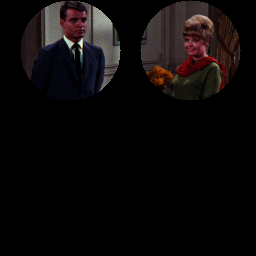

In [36]:
couple_and = cv.bitwise_and(couple,couple.copy(),mask=circle_mask)
cv2_imshow(couple_and)

### NAND Operator



explanation:
1. NAND is a combination of AND followed by NOT.
2. It returns the opposite of AND. So, pixels are "off" (black) only when both input pixels are white; otherwise, the result is "on" (white).
3. Why this result?: NAND gives a "negative" of the AND operation, inverting the regions where both images were "on."



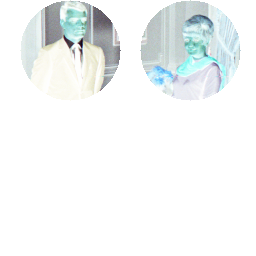

In [37]:
couple_nand = cv.bitwise_not(cv.bitwise_and(couple,couple.copy(),mask=circle_mask))
cv2_imshow(couple_nand)

### XOR Operator

explanation: XOR (cv2.bitwise_xor):
1. This returns white pixels only when the pixels from either one of the images are "on," but not both.
2. If both pixels are the same (both "on" or both "off"), the result is black.
3. Why this result?: XOR is like finding the difference between the two images—if the pixels are different, you get white; if they’re the same, you get black.

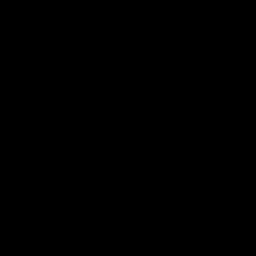

In [38]:
couple_xor = cv.bitwise_xor(couple,couple.copy(),mask=circle_mask)
cv2_imshow(couple_xor)